In [3]:
import dpkt
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
from Utils import *
from DDBSCAN import Raster_DBSCAN
import open3d as op3
from open3d.web_visualizer import draw
from VisulizerTools import *
import time
from sklearn.cluster import DBSCAN
import cv2 as cv
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [4]:
def get_maps(db,Td_map,threshold_map):
    Foreground_map = (Td_map < threshold_map)&(Td_map != 0)
    Labeling_map = clustering_td.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)
    return Foreground_map,Labeling_map

In [5]:
file_path = r'D:\LiDAR_Data\MidTown\Thoma\2021-12-18-12-0-0.pcap'
loader = TDmapLoader(file_path).frame_gen()
Td_maps = []
for td in tqdm(loader):
    if len(Td_maps) >= 2000:
        break
    if td is not None:
        Td_maps.append(td)
    else:
        break

2000it [01:14, 27.00it/s]


In [6]:
threshold_map = gen_bckmap(np.array(Td_maps),0.5,0.5,20,0.001,0.1)

In [7]:
clustering_td = Raster_DBSCAN(window_size=(5,15),eps = 1.2, min_samples= 12, Td_map_szie=threshold_map.shape)   

In [8]:
lk_params = dict( winSize  = (5, 5),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

In [9]:
def convert_fornmat(Td_map):
    Td_map[Td_map>200] = 200
    Td_map = ((Td_map/200)*255).astype(np.uint8)
    return Td_map

In [10]:
def get_features_pred(Labeling_map_cur,Labeling_map_next,Td_map_cur,Td_map_next):
    
    Td_map_cur,Td_map_next = convert_fornmat(Td_map_cur),convert_fornmat(Td_map_next)
    rows_cur, cols_cur = np.where(Labeling_map_cur != -1) # x0: col, y0: row 
    rows_next, cols_next = np.where(Labeling_map_next != -1) # x0: col, y0: row 
    p0 = np.array([cols_cur,rows_cur]).T
    p0 = p0.reshape(-1,1,2).astype(np.float32)
    p1, st, err = cv.calcOpticalFlowPyrLK(Td_map_cur, Td_map_next, p0, None, **lk_params)
    
    return p1,st,rows_cur,cols_cur,rows_next,cols_next

In [15]:
Td_map_cur,Td_map_next = Td_maps[37].copy(),Td_maps[38].copy()
Foreground_map_cur,Labeling_map_cur = get_maps(clustering_td,Td_map_cur,threshold_map)
Foreground_map_next,Labeling_map_next = get_maps(clustering_td,Td_map_next,threshold_map)

In [16]:
cooresponding_map = np.array([Labeling_map_cur.flatten(),Labeling_map_next.flatten()]).T

In [ ]:
def cal_mean_dist(pair,):
    

In [52]:
pairs,counts = np.unique(cooresponding_map,return_counts = True, axis = 0)
rows,cols = [for pair in pairs],[]
dises = [for pair in pairs]
# associate_pair_ind = ~(pairs == -1).any(axis = 1)
# associated_counts = counts[associate_pair_ind]
# associated_pairs = pairs[associate_pair_ind]

In [60]:
pairs

array([[-1, -1],
       [-1,  0],
       [-1,  1],
       [-1,  2],
       [-1,  3],
       [-1,  4],
       [-1,  5],
       [-1,  6],
       [-1,  7],
       [-1,  8],
       [-1, 10],
       [-1, 11],
       [-1, 12],
       [-1, 13],
       [-1, 14],
       [-1, 15],
       [-1, 16],
       [-1, 17],
       [-1, 18],
       [-1, 19],
       [-1, 20],
       [-1, 21],
       [-1, 22],
       [-1, 23],
       [-1, 24],
       [-1, 25],
       [-1, 26],
       [-1, 27],
       [-1, 28],
       [ 0, -1],
       [ 0,  1],
       [ 1, -1],
       [ 1,  2],
       [ 2, -1],
       [ 2,  3],
       [ 3, -1],
       [ 3,  4],
       [ 4, -1],
       [ 4,  7],
       [ 5, -1],
       [ 5,  5],
       [ 6, -1],
       [ 6, 10],
       [ 7, -1],
       [ 7,  6],
       [ 8, -1],
       [ 8,  9],
       [ 9, -1],
       [ 9, 11],
       [ 9, 21],
       [10, -1],
       [11, -1],
       [11, 12],
       [12, -1],
       [12, 17],
       [13, -1],
       [13, 18],
       [14, -1],
       [15, -1

In [89]:
associated_matrix = np.zeros((Labeling_map_cur.max() + 1,Labeling_map_next.max() + 1))
dis_matrix = 200 * np.ones((Labeling_map_cur.max() + 1,Labeling_map_next.max() + 1))
for i,pair in enumerate(pairs):
    if (-1 == pair).any():
        continue
    associated_matrix[pair[0],pair[1]] = counts[i]
    dis_matrix[]
    

In [50]:
ind = 7
pcd = get_pcd_colored_specified(Td_map_cur,Labeling_map_cur, [associated_pairs[ind,0]])
print(associated_counts[ind])
draw(pcd,height=1000,width=1000)
pcd = get_pcd_colored_specified(Td_map_next,Labeling_map_next, [associated_pairs[ind,1]])
draw(pcd,height=1000,width=1000)


18


WebVisualizer(window_uid='window_26')

WebVisualizer(window_uid='window_27')

In [86]:
p1,st,rows_cur,cols_cur,rows_next,cols_next = get_features_pred(Labeling_map_cur,Labeling_map_next,Td_map_cur,Td_map_next)

In [87]:
Label_cur,Label_next = Labeling_map_cur[Labeling_map_cur != -1],Labeling_map_next[Labeling_map_next != -1]

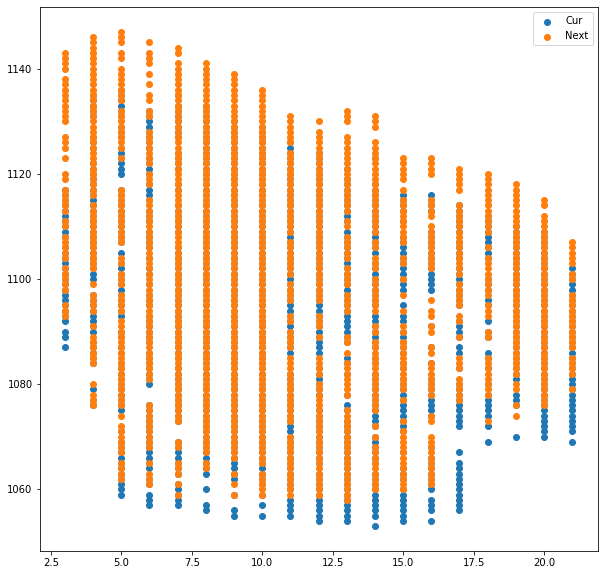

In [90]:
plt.figure(figsize=(10,10))
L_cur = 0
L_next = 1
plt.scatter(rows_cur[Label_cur == L_cur],cols_cur[Label_cur == L_cur],label = 'Cur')
# plt.scatter(p1[:,0,1][Label_cur == L_cur],p1[:,0,0][Label_cur== L_cur],label = 'Pred')
plt.scatter(rows_next[Label_next == L_next],cols_next[Label_next== L_next],label = 'Next')
plt.legend()
plt.show()

In [63]:
pcd = get_pcd_colored_specified(Td_map_next,Labeling_map_next, [1])
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_6')

In [66]:
pcd = get_pcd_colored_specified(Td_map_cur,Labeling_map_cur, [0])
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_9')

In [91]:
Labeling_map_cur

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int64)

In [92]:
Labeling_map_next

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int64)

In [52]:
clustering_td = Raster_DBSCAN(window_size=(5,15),eps = 1.2, min_samples= 12, Td_map_szie=threshold_map.shape)   
Td_map = Td_maps[20]
Foreground_map = (Td_map < threshold_map)&(Td_map != 0)
Labeling_map = clustering_td.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)
Background_map = (Td_map >= threshold_map)&(Td_map != 0)
pcd = get_pcd_colored_filtered(Td_map,Labeling_map,Foreground_map)
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_1')

In [50]:
Foreground_map = np.full(Td_maps[0].shape,True)
Labeling_map = np.ones_like(Foreground_map)
pcd = get_pcd_colored(Td_maps[0],Labeling_map)

In [51]:
draw(pcd)

WebVisualizer(window_uid='window_0')